<a href="https://colab.research.google.com/github/Murcha1990/Raiff_PracticalML_May2023/blob/main/Raiff_EDA_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задачи поиска оттоковых клиентов

* Загрузка данных и их анализ
* Обучение и оценка качества модели
  + обучение модели
  + оценка качества модели
* Интерпретация результатов модели
* Сохранение результатов

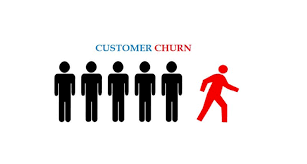

В курсе мы будем пользоваться следующими библиотеками Python:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Matplotlib - для визуализации данных
*   Sklearn - библиотеки с основными инструментами ML

С функционалом этих библиотек разберемся в процессе прохождения курса.

Будем решать задачу определения оттоковых клиентов,  а именно, *по характеристикам клиентов некоторого банка будем определять, собираются ли клиенты сменить оператора мобильной связи или нет*.

## <font color='green'>1. Загрузка данных и их первичный анализ</font>

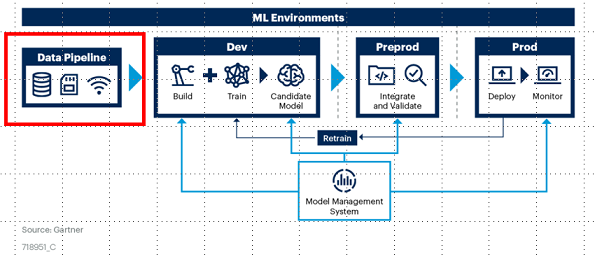

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

--2023-05-17 19:16:27--  https://storage.yandexcloud.net/cloud-certs/CA.pem
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3.5K) [application/x-x509-ca-cert]
Saving to: ‘/root/.postgresql/root.crt’

/root/.postgresql/r 100%[===================>]   3.50K  --.-KB/s    in 0s      

2023-05-17 19:16:27 (559 MB/s) - ‘/root/.postgresql/root.crt’ saved [3579/3579]



In [ ]:
!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,693 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,046 kB]
Get:14 http://

In [ ]:
import psycopg2

conn = psycopg2.connect("""
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
    port=6432
    sslmode=verify-full
    dbname=db_clients
    user=mlhs_student
    password=mlhs_student
    target_session_attrs=read-write
""")

In [ ]:
import pandas as pd

query = "SELECT * from public.clients"
data = pd.read_sql_query(query, conn)

conn.close()

Посмотрим на данные.

Описание данных клиентов:
* state, string. 2-letter code of the US state of customer residence
* account_length, numerical. Number of months the customer has been with the current telco provider
* area_code, string="area_code_AAA" where AAA = 3 digit area code.
* international_plan, (yes/no). The customer has international plan.
* voice_mail_plan, (yes/no). The customer has voice mail plan.
* number_vmail_messages, numerical. Number of voice-mail messages.
* total_day_minutes, numerical. Total minutes of day calls.
* total_day_calls, numerical. Total number of day calls.
* total_day_charge, numerical. Total charge of day calls.
* total_eve_minutes, numerical. Total minutes of evening calls.
* total_eve_calls, numerical. Total number of evening calls.
* total_eve_charge, numerical. Total charge of evening calls.
* total_night_minutes, numerical. Total minutes of night calls.
* total_night_calls, numerical. Total number of night calls.
* total_night_charge, numerical. Total charge of night calls.
* total_intl_minutes, numerical. Total minutes of international calls.
* total_intl_calls, numerical. Total number of international calls.
* total_intl_charge, numerical. Total charge of international calls
* number_customer_service_calls, numerical. Number of calls to customer service
* churn, (yes/no). Customer churn - target variable.




In [ ]:
data.head()

state  accountlength  areacode internationalplan voicemailplan  \
0    KS            128       415                No           Yes   
1    OH            107       415                No           Yes   
2    NJ            137       415                No            No   
3    OH             84       408               Yes            No   
4    OK             75       415               Yes            No   

   numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
0                   25            265.1          110.0           45.07   
1                   26            161.6          123.0           27.47   
2                    0            243.4          114.0           41.38   
3                    0            299.4           71.0           50.90   
4                    0            166.7          113.0           28.34   

   totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
0            197.4           99.0           16.78              244.7   
1            195.5          103.0           16.62              254.4   
2            121.2          110.0           10.30              162.6   
3             61.9           88.0            5.26              196.9   
4            148.3          122.0           12.61              186.9   

   totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
0             91.0             11.01              10.0             3.0   
1            103.0             11.45              13.7             3.0   
2            104.0              7.32              12.2             5.0   
3             89.0              8.86               6.6             7.0   
4            121.0              8.41              10.1             3.0   

   totalintlcharge  customerservicecalls  churn  
0             2.70                     1  False  
1             3.70                     1  False  
2             3.29                     0  False  
3             1.78                     2  False  
4             2.73                     3  False

In [ ]:
data.shape

(3333, 20)

In [ ]:
data.dtypes

state                    object
accountlength             int64
areacode                  int64
internationalplan        object
voicemailplan            object
numbervmailmessages       int64
totaldayminutes         float64
totaldaycalls           float64
totaldaycharge          float64
totaleveminutes         float64
totalevecalls           float64
totalevecharge          float64
totalnightminutes       float64
totalnightcalls         float64
totalnightcharge        float64
totalintlminutes        float64
totalintlcalls          float64
totalintlcharge         float64
customerservicecalls      int64
churn                      bool
dtype: object

## Сохранение данных

In [ ]:
data.to_csv("churn_clients.csv", index=False)

# Разведочный анализ данных

## 1. Оценка качества данных
* пропущенные значения
* ошибочные значения

In [ ]:
len(data)

3333

Посмотрим, есть ли в данных пропущенные значения.

In [ ]:
data.isna().sum()

state                   0
accountlength           0
areacode                0
internationalplan       0
voicemailplan           0
numbervmailmessages     0
totaldayminutes         0
totaldaycalls           0
totaldaycharge          0
totaleveminutes         0
totalevecalls           0
totalevecharge          0
totalnightminutes       0
totalnightcalls         0
totalnightcharge        0
totalintlminutes        0
totalintlcalls          0
totalintlcharge         0
customerservicecalls    0
churn                   0
dtype: int64

### Обработка пропущенных значений

Пропусков в данных нет. А что делать, если бы были?

Немного испортим данные.

In [ ]:
import numpy as np

data.at[np.random.choice(len(data),50), 'areacode'] = np.nan
data.at[np.random.choice(len(data),10), 'totaldayminutes'] = np.nan
data.at[np.random.choice(len(data),5), 'totaleveminutes'] = np.nan
data.at[np.random.choice(len(data),20), 'voicemailplan'] = "Nou"

In [ ]:
data.isna().sum()

state                    0
accountlength            0
areacode                49
internationalplan        0
voicemailplan            0
numbervmailmessages      0
totaldayminutes         10
totaldaycalls            0
totaldaycharge           0
totaleveminutes          5
totalevecalls            0
totalevecharge           0
totalnightminutes        0
totalnightcalls          0
totalnightcharge         0
totalintlminutes         0
totalintlcalls           0
totalintlcharge          0
customerservicecalls     0
churn                    0
dtype: int64

Areacode - **категориальный признак** (это код области, не число по сути). Обычно пропуски в таких признаках заполняют некоторой уникальной категорией.

In [ ]:
data['areacode']

0       415.0
1       415.0
2       415.0
3       408.0
4       415.0
        ...  
3328    415.0
3329    415.0
3330    510.0
3331    510.0
3332    415.0
Name: areacode, Length: 3333, dtype: float64

In [ ]:
data.areacode.value_counts()

415.0    1628
510.0     830
408.0     826
Name: areacode, dtype: int64

In [ ]:
data['areacode'] = data['areacode'].fillna(-100)

In [ ]:
data.areacode.value_counts()

 415.0    1628
 510.0     830
 408.0     826
-100.0      49
Name: areacode, dtype: int64

Totaldayminutes - **числовой признак**. Пропуски в числовых признаках обычно заполняют средним значением или медианой.

In [ ]:
median = data['totaldayminutes'].median()

data['totaldayminutes'].fillna(median, inplace=True)

In [ ]:
print(median)

179.4


In [ ]:
data.isna().sum()

state                   0
accountlength           0
areacode                0
internationalplan       0
voicemailplan           0
numbervmailmessages     0
totaldayminutes         0
totaldaycalls           0
totaldaycharge          0
totaleveminutes         5
totalevecalls           0
totalevecharge          0
totalnightminutes       0
totalnightcalls         0
totalnightcharge        0
totalintlminutes        0
totalintlcalls          0
totalintlcharge         0
customerservicecalls    0
churn                   0
dtype: int64

Заполните пропуски в столбце totaleveminutes медианным значением.

In [ ]:
# your code here

median = data['totaleveminutes'].median()
print(median)

data['totaleveminutes'].fillna(median, inplace=True)

201.4


## Вопрос для Quiz

Чему равна медиана в столбце totaleveminutes? Ответ округлите до целого числа.

## Ошибочные значения

Выведите на экран число различных значений в столбце voicemailplan, используя value_counts

In [ ]:
data['voicemailplan'].value_counts()

No     2396
Yes     917
Nou      20
Name: voicemailplan, dtype: int64

## Вопрос для Quiz

Сколько строк содержат ошибочное значение в столбце voicemailplan?

In [ ]:
data['voicemailplan'] = data['voicemailplan'].replace('Nou', 'No')

In [ ]:
data['voicemailplan'].value_counts()

No     2416
Yes     917
Name: voicemailplan, dtype: int64

## Основные числовые характеристики

In [ ]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [ ]:
data.describe()

accountlength     areacode  numbervmailmessages  totaldayminutes  \
count    3333.000000  3333.000000          3333.000000      3333.000000   
mean      101.064806   429.351335             8.099010       179.797690   
std        39.822106    77.166160            13.688365        54.416912   
min         1.000000  -100.000000             0.000000         0.000000   
25%        74.000000   408.000000             0.000000       143.700000   
50%       101.000000   415.000000             0.000000       179.400000   
75%       127.000000   415.000000            20.000000       216.200000   
max       243.000000   510.000000            51.000000       350.800000   

       totaldaycalls  totaldaycharge  totaleveminutes  totalevecalls  \
count    3333.000000     3333.000000      3333.000000    3333.000000   
mean      100.435644       30.562307       200.978428     100.114311   
std        20.069084        9.259435        50.679535      19.922625   
min         0.000000        0.000000         0.000000       0.000000   
25%        87.000000       24.430000       166.700000      87.000000   
50%       101.000000       30.500000       201.400000     100.000000   
75%       114.000000       36.790000       235.300000     114.000000   
max       165.000000       59.640000       363.700000     170.000000   

       totalevecharge  totalnightminutes  totalnightcalls  totalnightcharge  \
count     3333.000000        3333.000000      3333.000000       3333.000000   
mean        17.083540         200.872037       100.107711          9.039325   
std          4.310668          50.573847        19.568609          2.275873   
min          0.000000          23.200000        33.000000          1.040000   
25%         14.160000         167.000000        87.000000          7.520000   
50%         17.120000         201.200000       100.000000          9.050000   
75%         20.000000         235.300000       113.000000         10.590000   
max         30.910000         395.000000       175.000000         17.770000   

       totalintlminutes  totalintlcalls  totalintlcharge  customerservicecalls  
count       3333.000000     3333.000000      3333.000000           3333.000000  
mean          10.237294        4.479448         2.764581              1.562856  
std            2.791840        2.461214         0.753773              1.315491  
min            0.000000        0.000000         0.000000              0.000000  
25%            8.500000        3.000000         2.300000              1.000000  
50%           10.300000        4.000000         2.780000              1.000000  
75%           12.100000        6.000000         3.270000              2.000000  
max           20.000000       20.000000         5.400000              9.000000

In [ ]:
data.describe(include='object') # категориальные колонки

state internationalplan voicemailplan
count   3333              3333          3333
unique    51                 2             2
top       WV                No            No
freq     106              3010          2416

In [ ]:
corr = data.corr() # строим матрицу корреляций

corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# data[['totaldaycharge','totaldayminutes']]

In [ ]:
data = data.drop(['totaldaycharge','totalnightcharge','totalintlcharge','totalevecharge'],axis=1)

In [ ]:
for col in data.columns:
    try:
        print(col, np.corrcoef(data[col], data['churn'])[0][1])
    except:
        pass

accountlength 0.016540742243674116
areacode 0.0033285018299071545
numbervmailmessages -0.08972796983506436
totaldayminutes 0.2045592467191817
totaldaycalls 0.018459311608576896
totaleveminutes 0.09287421159283722
totalevecalls 0.009233131913078275
totalnightminutes 0.03549285342127401
totalnightcalls 0.006141203007399705
totalintlminutes 0.06823877562717724
totalintlcalls -0.05284433577413811
customerservicecalls 0.20874999878379402
churn 1.0


## Вопрос для Quiz

Какой признак имеет наибольшую корреляцию с целевой переменной (churn)?

## Визуализация данных

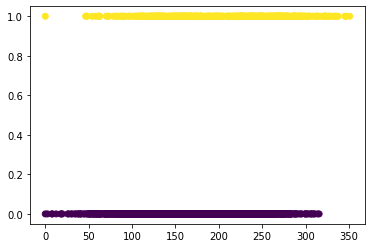

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['totaldayminutes'], data['churn'], c=data['churn'])

In [ ]:
data.groupby('churn')['totaldayminutes'].mean()

churn
False    175.215860
True     206.833333
Name: totaldayminutes, dtype: float64

Постройте диаграмму рассеяния для оценки влияния признака customerservicecalls на целевую переменную churn.

In [ ]:
# your code here

Посчитайте среднее значение customerservicecalls для оттоковых и не оттоковых клиентов, используйте groupby.

In [ ]:
# your code here

data.groupby('churn')['customerservicecalls'].mean()

churn
False    1.449825
True     2.229814
Name: customerservicecalls, dtype: float64

## Вопрос для Quiz

У каких клиентов больше среднее значение customerservicecalls?

## <font color='green'>2.1. Обучение модели</font>



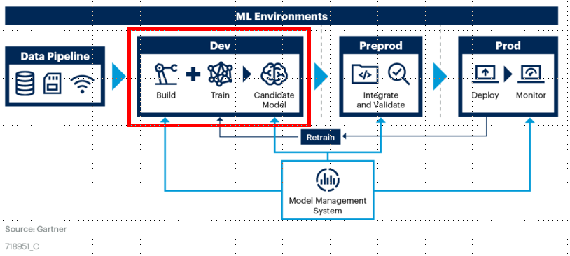

Сформируем матрицу X объект-признак и вектор y целевой переменной.

In [ ]:
X = data.drop('churn', axis=1) # матрица объект-признак
y = data['churn'] # целевая переменная

Когда мы решаем задачу классификации, мы можем захотеть предсказывать не только классы, но и их вероятности. Для целей бизнеса, например, полезно знать, с какой вероятностью клиент вернет кредит (а не просто - вернет кредит или не вернет). Например, если клиент уйдет из банка с вероятностью 0.95, то это очень ненадежный клиент. А если с вероятностью 0.52  - этот клиент под вопросом. Но с точки зрения бинарной классификации для обоих клиентов модель предскажет, что они уйдут, так как стандартный порог перевода вероятности в классы - 0.5. 

* задача классификации, в которой модель предсказывает только классы - это **жесткая классификация**
* если же классификатор предсказывает вероятности классов - это **мягкая классификация**

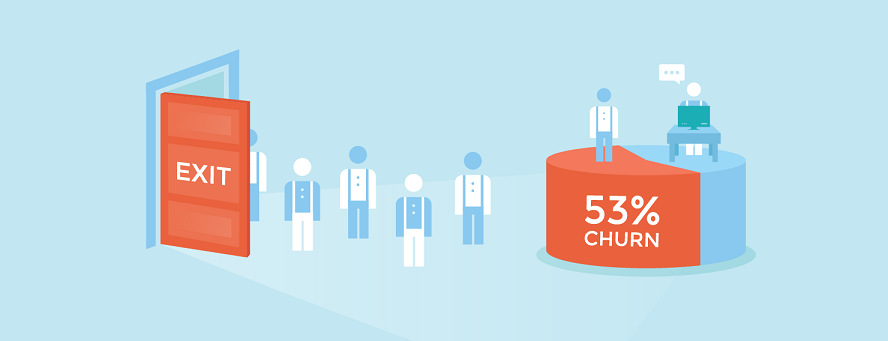

**Логистическая регрессия** - это линейный классификатор, который кроме классов умеет предсказывать вероятности классов.

Модель делает предсказания по формуле
$$a(x) = \sigma(w_0 + w_1x_1 + w_2x_2 + ...),$$
то есть умножает признаки объекта $x_1,x_2,...$ на некоторые веса $w_0,w_1,w_2,...$

Например, если 
* $x_1$ - возраст клиента
* $x_2$ - число жалоб клиента на банк, 
то обученная модель может иметь вид
$$a(x) = \sigma(10 - 3x_1 + 50x_2)$$

Веса модели подбираются автоматически так, чтобы ошибка предсказания модели была минимальной.

Функция $\sigma(x)$ - переводит предсказания модели в вероятности:

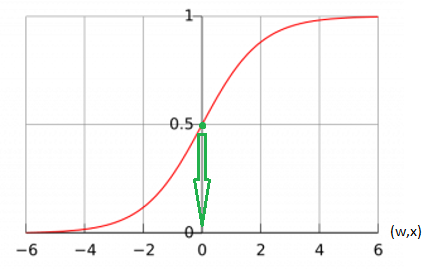

Давайте применим логистическую регрессию для поиска оттоковых клиентов!

Сначала выкинем нечисловые столбцы.

In [ ]:
X = X.drop(['state','areacode','voicemailplan','internationalplan'], axis=1)

Разобъём данные на train и test (test — 25% от всех данных). Зачем это делается?

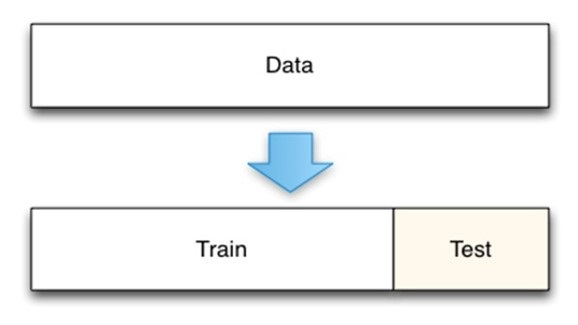

Мы разбиваем данные на train и test, чтобы:
* на тренировочных данных обучить модель
* на тестовых применить обученную модель и затем проверить качество модели

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

## Вопрос для Quiz

В одинаковых ли масштабах измеряются признаки клиентов?

Для ответа на этот вопрос выведите на экран первые несколько строчек таблицы X (вам поможет функция head).

In [ ]:
# your code here
X.head()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
0            128                   25            265.1          110.0   
1            107                   26            161.6          123.0   
2            137                    0            243.4          114.0   
3             84                    0            299.4           71.0   
4             75                    0            166.7          113.0   

   totaleveminutes  totalevecalls  totalnightminutes  totalnightcalls  \
0            197.4           99.0              244.7             91.0   
1            195.5          103.0              254.4            103.0   
2            121.2          110.0              162.6            104.0   
3             61.9           88.0              196.9             89.0   
4            148.3          122.0              186.9            121.0   

   totalintlminutes  totalintlcalls  customerservicecalls  
0              10.0             3.0                     1  
1              13.7             3.0                     1  
2              12.2             5.0                     0  
3               6.6             7.0                     2  
4              10.1             3.0                     3

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
0      -1.404508            -0.584700        -1.886522       1.330852   
1       0.366388            -0.584700         0.293965       0.529165   
2       0.518179             1.685101         1.057228      -1.875896   
3       2.010792            -0.584700        -0.680492       1.681590   
4       0.290493            -0.584700         0.484781       1.080325   

   totaleveminutes  totalevecalls  totalnightminutes  totalnightcalls  \
0         1.038293       0.401340           1.069609         0.004940   
1         0.516333       0.401340           2.214376         0.670832   
2         0.093229       0.849774          -0.077125        -0.763398   
3        -0.403029       0.650470          -0.322994        -0.660953   
4        -0.719368      -0.296224          -1.186487         0.056162   

   totalintlminutes  totalintlcalls  customerservicecalls  
0          2.768109       -0.595235             -0.427903  
1          1.051970       -1.417963              0.324616  
2         -0.056369        0.227493              1.829653  
3         -0.056369       -0.183871             -0.427903  
4          0.837453        1.050221              1.077134

Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # объявление модели
model.fit(Xtrain, ytrain) # обучение модели

LogisticRegression()

In [ ]:
pred_test = model.predict(Xtest) # предсказание классов

Посмотрим на предсказания модели и оценим ее качество.

In [ ]:
pred_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
accuracy_score(ytest, pred_test)

0.8561151079136691

## Вопрос для Quiz

Доля верно определенных классов высокая! Значит ли это, что качество хорошее?


Проверим, сбалансирована ли выборка.

In [ ]:
y.value_counts()

False    2850
True      483
Name: churn, dtype: int64

Баланса классов нет: большинство клиентов не собирается менять банк ($y=0$). 

Посмотрим, что предсказывает модель.

In [ ]:
pred_test[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

## <font color='green'>2.2. Валидация модели</font>

Для оценки качества модели используются различные метрики качества. Давайте посмотрим, какие метрики полезно считать в задаче классификации, кроме accuracy.

<font color='blue'>Для оценки качества моделей бинарной классификации полезно смотреть на **матрицу ошибок** (confusion matrix):</font>

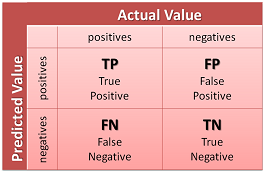

Эта матрица состоит из четырех чисел:

* **True Positive (TP)** - количество объектов положительного класса, предсказанных моделью как положительные (верные предсказания)
* **False Positive (FP)** - количество объектов отрицательного класса, предсказанных моделью как положительные (ошибки модели)
* **False Negative (FN)** - количество объектов положительного класса, предсказанных моделью как отрицательные (ошибки модели)
* **True Negative (TN)** - количество объектов отрицательного класса, предсказанных моделью как отрицательные (верные предсказания).

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, pred_test)

In [ ]:
ytest.value_counts()

Модель верно определила очень мало оттоковых клиентов :(

<font color='blue'>Также можно посмотреть на метрику **recall (полнота)** - она показывает, какую долю оттоковых клиентов (объектов положительного класса) нашла модель.</font>

In [ ]:
from sklearn.metrics import recall_score

recall_score(ytest, pred_test)

## Вопрос для Quiz

Что означает это значение метрики recall?

Давайте разберемся, почему так произошло?

Посмотрим на вероятности, выдаваемые моделью.

In [ ]:
probs = model.predict_proba(Xtest)

probs[:10]

Модель слишком позитивна. Она присваивает классу 0 (клиент не уйдет) всегда большие вероятности. 

<font color='blue'>Попробуем изменить **порог для перевода вероятности в классы** со стандартного 0.5 на порог поменьше.</blue>

In [ ]:
probs_churn = probs[:,1]

classes = probs_churn > 0.2

In [ ]:
confusion_matrix(ytest, classes)

In [ ]:
ytest.value_counts()

In [ ]:
recall_score(ytest, classes)

Теперь модель стала находить оттоковых клиентов, но и больше ошибается на тех клиентах, которые не уйдут.

## <font color='green'>3. Интерпретация модели</font>

После обучения модели можно посмотреть на её веса, то есть на коэффициенты при признаках, найденные моделью.

In [ ]:
model.coef_, model.intercept_

(array([[ 0.06584498, -0.30701139,  0.31479709,  0.01442553,  0.3148823 ,
          0.15265995,  0.04292986,  0.15237034,  0.05383781,  0.01156402,
          0.05346644,  0.14409823, -0.20621332,  0.14457418,  0.6019273 ]]),
 array([-2.12115493]))

In [ ]:
import pandas as pd

coef_table = pd.DataFrame({'features' : list(X.columns), 'weights' : list(model.coef_[0])})

coef_table.sort_values(by='weights')

features   weights
1    numbervmailmessages -0.307011
12        totalintlcalls -0.206213
9        totalnightcalls  0.011564
3          totaldaycalls  0.014426
6          totalevecalls  0.042930
10      totalnightcharge  0.053466
8      totalnightminutes  0.053838
0          accountlength  0.065845
11      totalintlminutes  0.144098
13       totalintlcharge  0.144574
7         totalevecharge  0.152370
5        totaleveminutes  0.152660
2        totaldayminutes  0.314797
4         totaldaycharge  0.314882
14  customerservicecalls  0.601927

Если вес у признака положительный, то признак вносит положительный вклад в ответ, то есть чем больше значение признака, тем больше это дает вклад в положительный класс объекта и наоборот.

## Метод ближайших соседей (бонус)

Существует еще один простой метод для решения задач классификации - метод ближайших соседей.

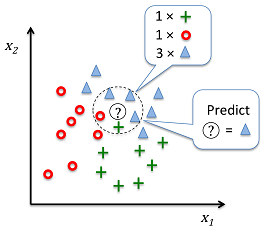

Попробуем применить метод ближайших соседей для решения поставленной задачи.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn.fit(Xtrain, ytrain)

pred_test2 = knn.predict_proba(Xtest)[:,1]

classes2 = pred_test2 > 0.1

confusion_matrix(ytest, classes2)

array([[469, 240],
       [ 28,  97]])

## Вопрос для Quiz

Вычислите recall (долю найденных моделью оттоковых клиентов) при пороге 0.1. Ответ не округляйте.

In [ ]:
# ваш код здесь

## <font color='green'>4. Сохранение результатов экспериментов</font>

Что сохраняем?

* Предсказания модели
* Эксперименты
* Модель

Сначала сохраним предсказания модели в файл:

In [ ]:
Xtest['predictions'] = probs_churn

Xtest[['predictions']].to_csv("PredictionsChurn.csv", index=False)

Теперь сохраним саму модель:

In [ ]:
import pickle 

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# а так модель можно загрузить из файла:  
# with open('filename.pickle', 'rb') as f:
#     model = pickle.load(f)

Сохраним полученную модель, файл с предсказаниями и ноутбук с экспериментами на гитхаб.

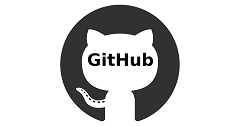

## <font color='green'>5. Градиентный бустинг</font>

Мы поработали с линейными моделями. Они весьма и весьма простые — предполагают независимость признаков и линейную связь между каждым признаком и целевой переменной. Конечно, в наших данных вряд ли всё так просто. Можно пытаться усложнять линейные модели: добавлять нелинейные признаки, переходить в новое признаковое пространство. Но это всё полумеры.

Сейчас мы поработаем с градиентным бустингом — одним из самых мощных подходов для работы с табличными данными.

Пока не ушли далеко — посчитаем и запомним качество логистической регрессии.

In [ ]:
from sklearn import metrics

print("LR quality:")
print("precision: ", metrics.precision_score(ytest, classes))
print("recall: ", metrics.recall_score(ytest, classes))
print("auc-roc: ", metrics.roc_auc_score(ytest, probs[:, 1]))

LR quality:
precision:  0.39901477832512317
recall:  0.648
auc-roc:  0.7885585331452751


Есть много имплементаций градиентного бустинга. Мы будем пользоваться CatBoost — библиотекой от Яндекса, которая очень эффективно написана и широко используется в мире.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
train_set = Pool(Xtrain, ytrain)
test_set = Pool(Xtest, ytest)

In [ ]:
gbm = CatBoostClassifier(iterations=100,
                          depth=2,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(Xtest)

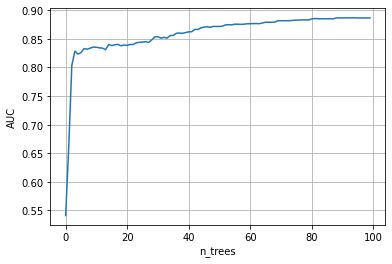

In [ ]:
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('n_trees')
plt.ylabel('AUC')
plt.grid()

In [ ]:
gbm_classes = (gbm_preds[:, 1] > 0.3)
print("precision: ", metrics.precision_score(ytest, gbm_classes))
print("recall: ", metrics.recall_score(ytest, gbm_classes))
print("auc-roc: ", metrics.roc_auc_score(ytest, gbm_preds[:, 1]))

precision:  0.7346938775510204
recall:  0.576
auc-roc:  0.8868265162200282


In [ ]:
coef_table = pd.DataFrame({'features' : list(X.columns), 'importances' : list(gbm.get_feature_importance())})

coef_table.sort_values(by='importances')

features  importances
3          totaldaycalls     0.000000
5          totalevecalls     0.009837
7        totalnightcalls     0.069067
0          accountlength     0.211131
6      totalnightminutes     1.434716
9         totalintlcalls     5.150191
1    numbervmailmessages     5.545506
8       totalintlminutes     6.831508
4        totaleveminutes    10.295718
10  customerservicecalls    29.734287
2        totaldayminutes    40.718038

## Вопрос для Quiz

Попробуйте обучить градиентный бустинг с другой длиной шага. Получится ли улучшить AUC-ROC на тесте?

In [ ]:
# ваш код здесь

## <font color='green'>6. Обработка категориальных признаков</font>

Выше мы удаляли все категориальные столбцы:

`X = X.drop(['state','areacode','voicemailplan','internationalplan'], axis=1)`

А вдруг там содержится много полезной информации? Попробуем её сохранить.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['state','areacode','voicemailplan','internationalplan']
numeric_features = X.columns

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

X_transformed = column_transformer.fit_transform(Xtrain)
X_test_transformed = column_transformer.transform(Xtest)

In [ ]:
X_transformed.shape

(2499, 69)

In [ ]:
model = LogisticRegression()
model.fit(X_transformed, ytrain)
pred = model.predict_proba(X_test_transformed)

In [ ]:
classes = (pred[:, 1] > 0.5)
print("precision: ", metrics.precision_score(ytest, classes))
print("recall: ", metrics.recall_score(ytest, classes))
print("auc-roc: ", metrics.roc_auc_score(ytest, pred[:, 1]))

precision:  0.5681818181818182
recall:  0.2
auc-roc:  0.8343244005641749


In [ ]:
train_set = Pool(X_transformed, ytrain)
test_set = Pool(X_test_transformed, ytest)
gbm = CatBoostClassifier(iterations=100,
                          depth=2,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(test_set)
gbm_classes = (gbm_preds[:, 1] > 0.3)
print("precision: ", metrics.precision_score(ytest, gbm_classes))
print("recall: ", metrics.recall_score(ytest, gbm_classes))
print("auc-roc: ", metrics.roc_auc_score(ytest, gbm_preds[:, 1]))

precision:  0.8495575221238938
recall:  0.768
auc-roc:  0.9301156558533146
